# Problem Statement:
## The Ionosphere Dataset requires the prediction of structure in the atmosphere given radar returns targeting free electrons in the ionosphere

## Dataset

The dataset for this problem is the Ionosphere dataset downloaded from https://archive.ics.uci.edu/ml/datasets/Ionosphere. Number of instances are 351. It is a multivariate data set, containing 34 attributes that are either integer or real. There are no missing values. This data set contains 225 'good' labelled records and 126 'bad' labelled records. 

1. Title: Johns Hopkins University Ionosphere database

2. Source Information:
   -- Donor: Vince Sigillito (vgs@aplcen.apl.jhu.edu)
   -- Date: 1989
   -- Source: Space Physics Group
              Applied Physics Laboratory
              Johns Hopkins University
              Johns Hopkins Road
              Laurel, MD 20723 

## Approach

* It is a binary classification problem
* There are 34 independent variables.
* All of the independent variables are integers/real. 
* Dependent variable (class label) is categorical (with values 'g' or 'b'). 
* There are no missing values. 
* We will encode the class label (dependent variable) to convert categorical values to numerical values. 
* We will do feature scaling to standarise the feature values with mean as zero and std. devation as one.
* Model the prediction by building a nerual network using keras.
* Evaluate the model using cross validation methods(k-fold)
* Print the accuracy and the confusion matrix. 

## 1. Load the libraries

In [1]:
import numpy as np
import pandas as pd
import np_utils
import matplotlib.pyplot as plt
import math

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

## 2. Load the dataset to a pandas dataframe

In [3]:
data=pd.read_csv("ionosphere.csv")

### 2.1 Assign the independent variables to X and the dependent variable to y

In [4]:
X=data.iloc[:,:-1].values

In [5]:
y=data.iloc[:,-1].values

## 3. Exploratory Data Analysis

In [6]:
data.shape

(351, 35)

In [7]:
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [8]:
X.shape

(351, 34)

### 3.1 Draw a box plot to visualise the distribution of data

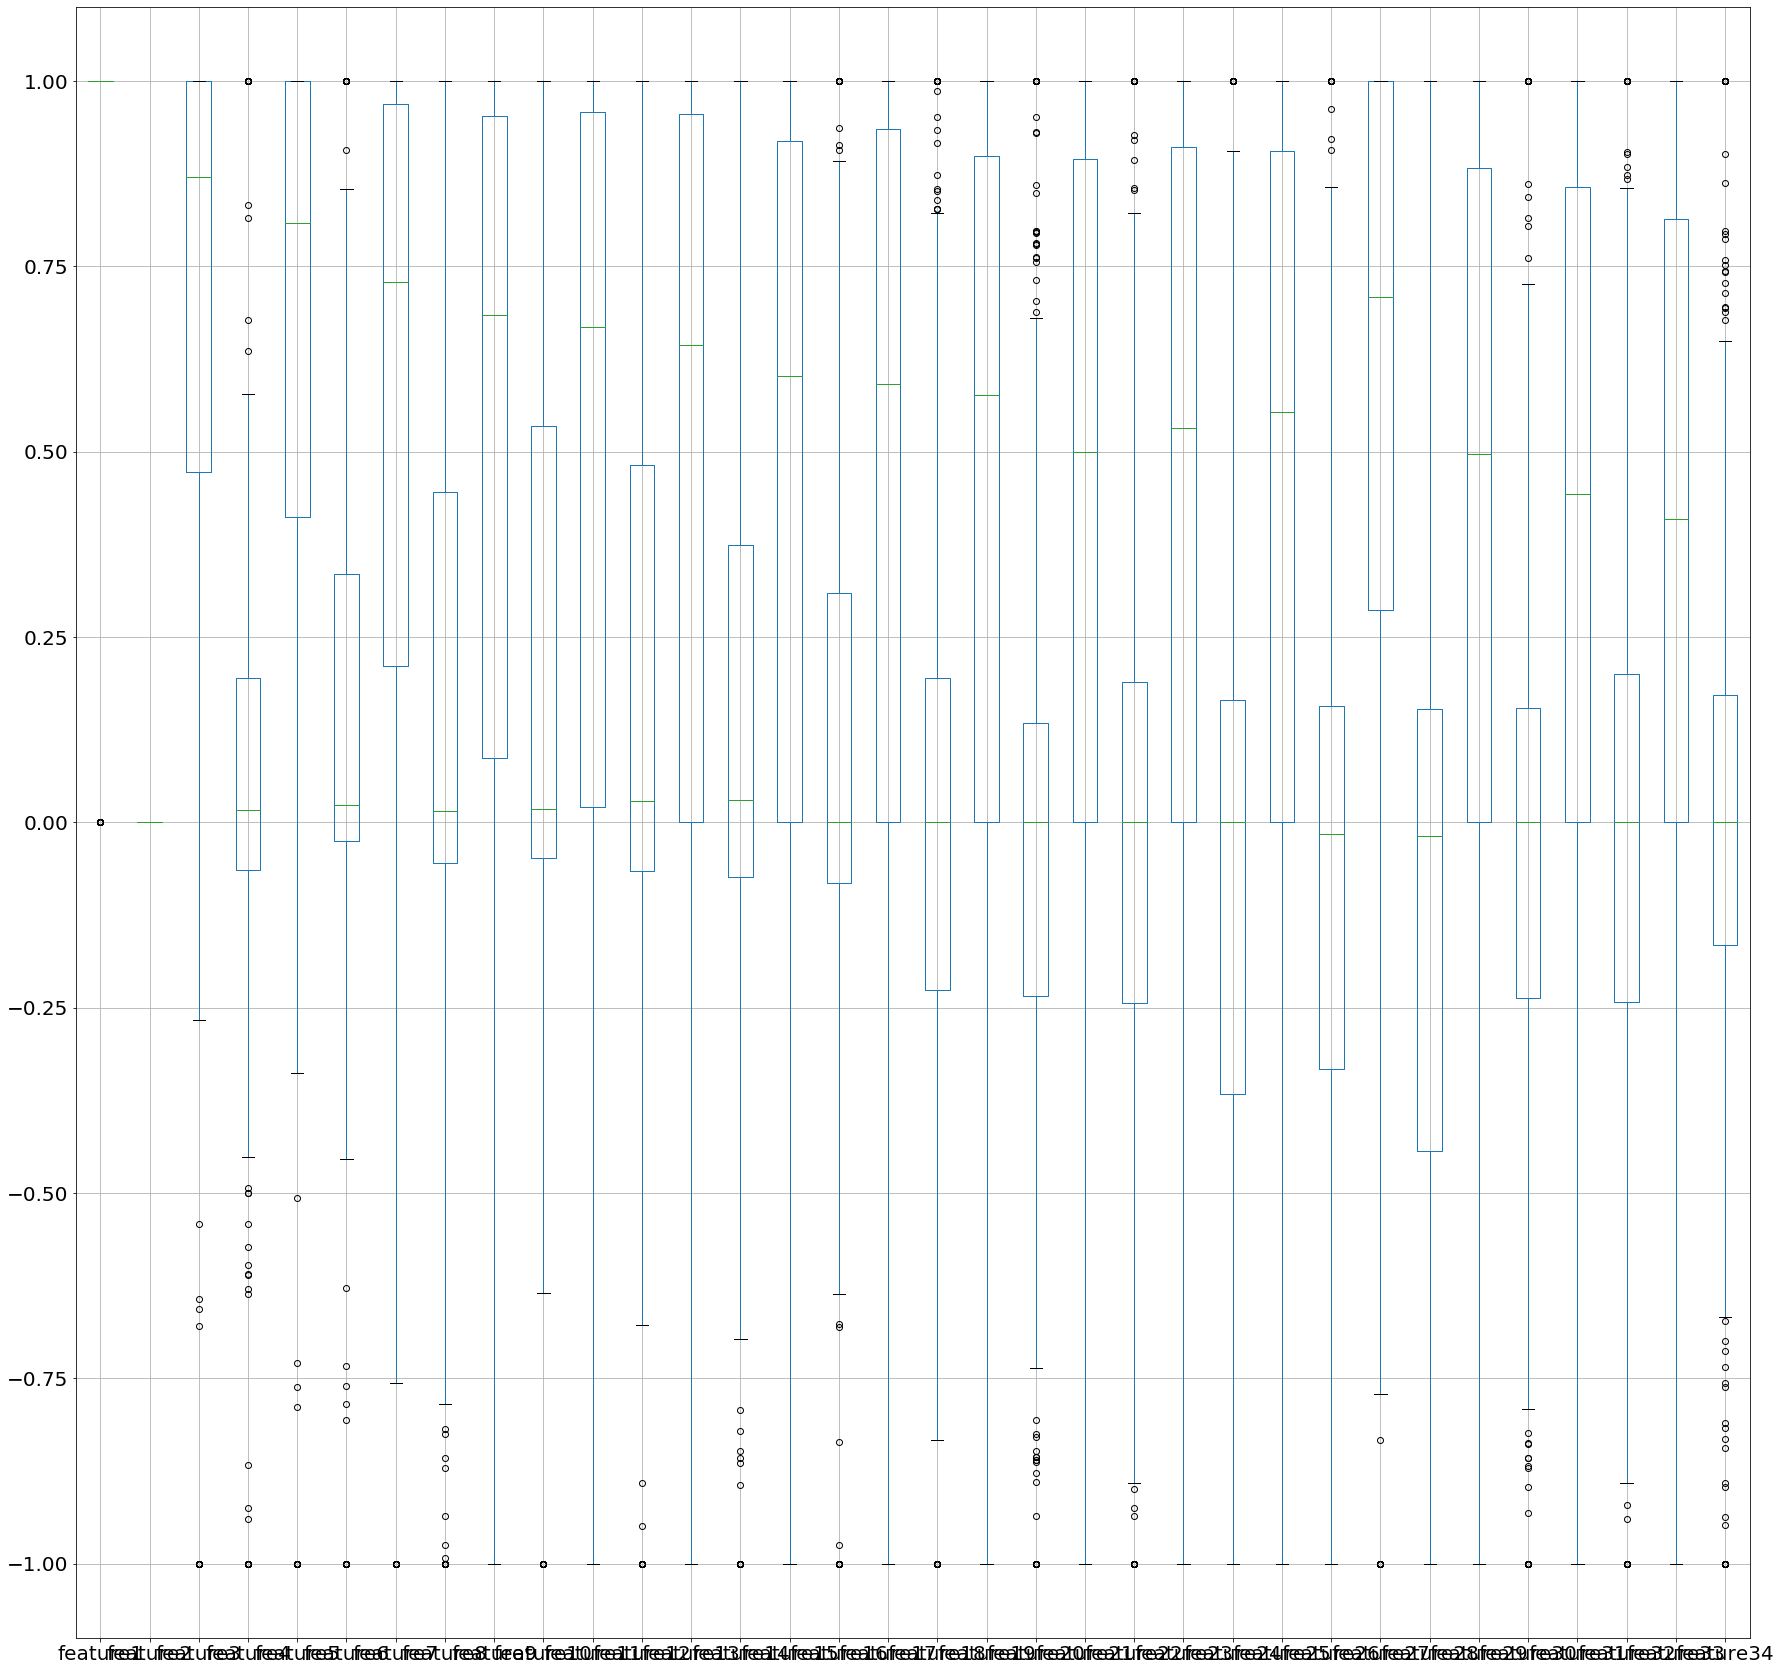

In [9]:
boxplot = data.boxplot(fontsize = 20, figsize=(30,30))

## 4. Data pre-processing

###  4.1 Encode the dependent variable  to conver the categorical values to numerals

In [10]:
encoder = LabelEncoder() 
encoder.fit(y) 
Y= encoder.transform(y)

### 4.2 Split the dataset into training dataset and test dataset

In [11]:
# train_test_split
from sklearn.model_selection import train_test_split, ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
# X_train.to_csv("training_data.csv", sep=',', index=False)
# X_test.to_csv("test_data.csv", sep=',', index=False)

Training set has 280 samples.
Testing set has 71 samples.


### 4.3 Feature importance

In [12]:
# XGB
import xgboost as xgb

# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [13]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X, Y, scoring='roc_auc', cv=3)

In [14]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9447619047619047


In [15]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

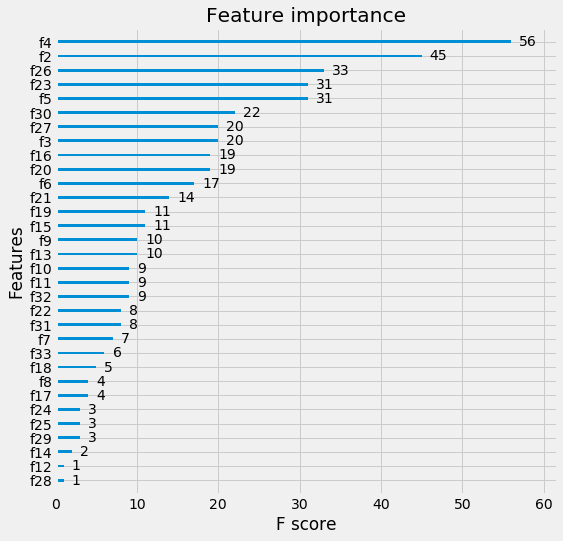

In [16]:
# plot styple
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 8))

# plot feature importance
xgb.plot_importance(xgb_cl, ax=ax)

### Feature columns 29, 13, 15, 30, 26, 25, 18, 9 seem to be not important features and can be removed from being trained. 
Note: index starts from zero

In [17]:
# X = np.asarray(X)
X_ImportantFeatures = data.drop(data.columns[[28, 12, 14, 29, 25, 24, 17, 8]], axis = 1)
X_ImportantFeatures=X_ImportantFeatures.iloc[:,:-1].values

### 4.4 Feature scaling

<b> Below snippet explains why it is benefical to scale the data before we train the neural network </b>

 https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d
 
 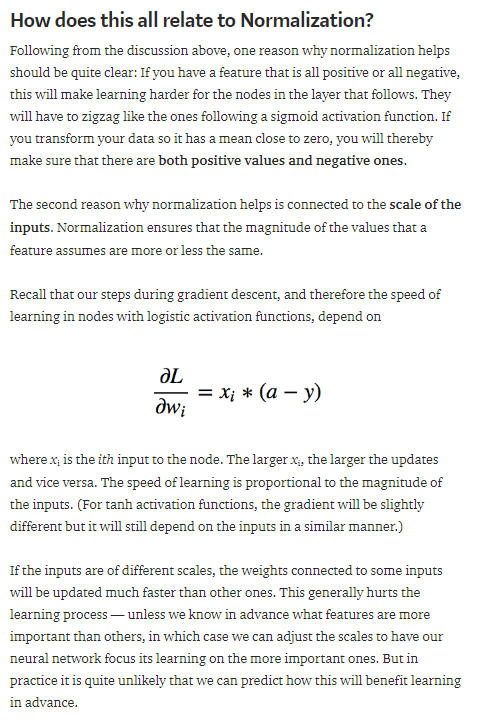

<b> Scale the input data using standardscaler method. </b>

Standardization (subtracting mean and scaling variance) is required for many machine learning algorithms. One can use following scaling methods - 

1. MinMaxScaler - It preserves zero entries if the feature matrix is sparse, and is also robust to small values of S.D. for features.

2. StandardScaler - Center around zero, change variance to 1.

3. RobustScaler - Useful if there are a lot of outliers in data, this method uses percentiles to center and scale data.

Normalizing, on the other hand, causes one row of the input (one sample) to have unit norm. 

We use StandardScaler. 

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(X_ImportantFeatures)
X_ImportantFeatures = pd.DataFrame(scaled_data)
# X_ImportantFeatures.to_csv("X_scaled.csv", sep=',', index=False)

### Split the dataset with important features into training and test dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ImportantFeatures, Y, test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
# X_train.to_csv("training_data.csv", sep=',', index=False)
# X_test.to_csv("test_data.csv", sep=',', index=False)

Training set has 280 samples.
Testing set has 71 samples.


## 5. Modelling

In [20]:
seed=7
np.random.seed(seed)

### 5.1 Create a neural network with three layers and compile the model. 
The first layer consisting of 34 units and the second layer consists of 16 hidden units. Third layer consists of 1 unit. We use 'relu'(REctified Linear Unit) as the activiation function for the first and second layers and sigmoid for the final layer

In [21]:
n_epochs = 50

model = Sequential() 
model.add(Dense(34, input_dim=26, activation= "relu" )) 
model.add(Dense(16, activation= "relu" ))
model.add(Dense(1, activation= "sigmoid" )) 
# Compile model     
learning_rate = 0.1 
decay_rate = learning_rate / n_epochs 
momentum = 0.8 
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= "binary_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epochs, batch_size=28, verbose=2)

Train on 280 samples, validate on 71 samples
Epoch 1/50
280/280 - 4s - loss: 0.7274 - accuracy: 0.6821 - val_loss: 0.5357 - val_accuracy: 0.8451
Epoch 2/50
280/280 - 0s - loss: 0.4367 - accuracy: 0.8286 - val_loss: 0.3589 - val_accuracy: 0.8732
Epoch 3/50
280/280 - 0s - loss: 0.2700 - accuracy: 0.8929 - val_loss: 0.2819 - val_accuracy: 0.8873
Epoch 4/50
280/280 - 0s - loss: 0.1839 - accuracy: 0.9214 - val_loss: 0.2145 - val_accuracy: 0.9437
Epoch 5/50
280/280 - 0s - loss: 0.1298 - accuracy: 0.9500 - val_loss: 0.1688 - val_accuracy: 0.9437
Epoch 6/50
280/280 - 0s - loss: 0.1044 - accuracy: 0.9571 - val_loss: 0.1513 - val_accuracy: 0.9577
Epoch 7/50
280/280 - 0s - loss: 0.0893 - accuracy: 0.9679 - val_loss: 0.1714 - val_accuracy: 0.9155
Epoch 8/50
280/280 - 0s - loss: 0.0673 - accuracy: 0.9750 - val_loss: 0.1544 - val_accuracy: 0.9437
Epoch 9/50
280/280 - 0s - loss: 0.0878 - accuracy: 0.9714 - val_loss: 0.1694 - val_accuracy: 0.9296
Epoch 10/50
280/280 - 0s - loss: 0.0567 - accuracy: 0.9

### 5. 2 Accuracy of the model

In [22]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("-----------------------------")
print("Training Accuracy: %.2f%%" % (train_acc*100))
print("Prediction Accuracy: %.2f%%" % (test_acc*100))
# print("Standard Deviation: %.2f%%" % (results.std()*100))
print("-----------------------------")

-----------------------------
Training Accuracy: 100.00%
Prediction Accuracy: 90.14%
-----------------------------


### 5.3 Display the confusion matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
X_test = np.asarray(X_test)

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

Confusion matrix, without normalization
[[45  3]
 [ 4 19]]


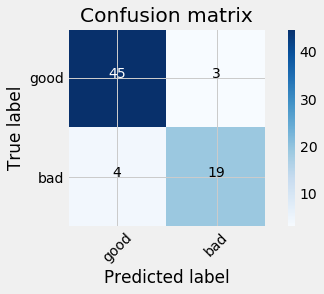

In [25]:
predictions_test = model.predict(X_test) # predictions on test set
cnf_matrix = confusion_matrix(y_test, yhat_classes, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good','bad'],normalize= False,  title='Confusion matrix')